In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import kagglehub
import cv2
import os
import random
import tkinter as tk
from tkinter import filedialog
#!pip install --upgrade --force-reinstall ultralytics
!pip install ultralytics
import matplotlib.pyplot as plt
from ultralytics import YOLO
import cv2
# Download latest version
path = kagglehub.dataset_download("pkdarabi/bone-fracture-detection-computer-vision-project")

print("Path to dataset files:", path)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 kB 31.2 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Path to dataset files: /kaggle/input/bone-fracture-detection-computer-vision-project


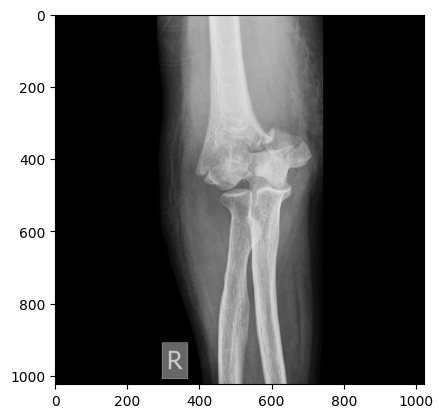

In [6]:
train_images_1 = path + "/BoneFractureYolo8/train/images/distal-humeral-fractures-2-_JPEG.rf.39ba3f53047ecb4064613850a1c76fc1.jpg"
train_images =path + "/BoneFractureYolo8/train/images"
train_labels =path + "/BoneFractureYolo8/train/labels"

test_images = path + "/BoneFractureYolo8/test/images"
test_labels = path + "/BoneFractureYolo8/test/labels"

valid_images  = path + "/BoneFractureYolo8/valid/images"
valid_labels = path + "/BoneFractureYolo8/valid/labels"
#print(train)

config_file = path + "/BoneFractureYolo8/data.yaml"
img = cv2.imread(train_images_1, cv2.IMREAD_UNCHANGED)
#print(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Display the image
window_name = 'image'
plt.imshow( img)


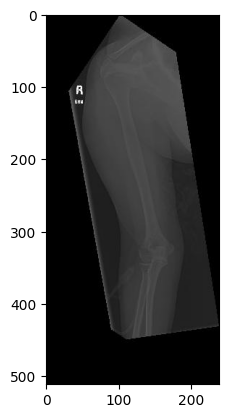

In [7]:
image_files = os.listdir(train_images)

# Choose 16 random image files from the list
random_images = random.sample(image_files, 16)

# Set up the plot
#fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    #row /= i // 4
    #col = i % 4

    # Load the image
    image_path = os.path.join(train_images, image_file)
    #image = cv2.imread(image_path)
    img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
#print(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)


In [8]:
#import os

//Couldn't run the below code due to Kaggle's interface

import os
import shutil

def remove_images_with_empty_labels(image_folder, label_folder, output_folder):
    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)
    
    for image_file in os.listdir(image_folder):
        image_path = os.path.join(image_folder, image_file)
        label_file = image_file.replace('.jpg', '.txt')  # Assuming labels are in .txt files
        label_path = os.path.join(label_folder, label_file)

        if not os.path.exists(label_path) or os.path.getsize(label_path) == 0:
            # Move the image to a different folder instead of removing
            shutil.move(image_path, os.path.join(output_folder, image_file))
            print(f"Moved image: {image_file}")
        else:
            # If the label is not empty, you can leave the image in place
            print(f"Kept image: {image_file}")

Call the function with an output directory for the cleaned images
remove_images_with_empty_labels(images_path, labels_path, "/kaggle/working/cleaned_images")


<font size="15">Model Training </font>


In [ ]:
model = YOLO('yolov8l.pt')

results = model.train(data = config_file, epochs = 100, imgsz = 640)
model.export(format="onnx")

Ultralytics 8.3.34 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_co

100%|██████████| 755k/755k [00:00<00:00, 53.1MB/s]
2024-11-21 09:19:12,788	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-11-21 09:19:13,598	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytics

train: Scanning /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/train/labels... 3631 images, 1827 backgrounds, 0 corrupt: 100%|██████████| 3631/3631 [00:13<00:00, 267.70it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/valid/labels... 348 images, 175 backgrounds, 0 corrupt: 100%|██████████| 348/348 [00:01<00:00, 227.59it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train4
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      10.8G      2.767      5.359      2.511         17        640: 100%|██████████| 227/227 [03:30<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.49it/s]

                   all        348        204      0.354      0.078     0.0101    0.00441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100        11G      2.698      4.615      2.485         26        640: 100%|██████████| 227/227 [03:28<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.89it/s]

                   all        348        204   0.000458      0.117    0.00102   0.000162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      10.7G      2.669      4.422      2.423         19        640: 100%|██████████| 227/227 [03:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.94it/s]

                   all        348        204      0.505     0.0174    0.00901    0.00281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100        11G      2.643      4.397      2.382         18        640: 100%|██████████| 227/227 [03:26<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.93it/s]

                   all        348        204      0.435     0.0454     0.0124    0.00297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      10.7G      2.587      4.237       2.37         25        640: 100%|██████████| 227/227 [03:26<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]

                   all        348        204      0.492     0.0386     0.0312     0.0115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      10.9G      2.535      4.009      2.336         14        640: 100%|██████████| 227/227 [03:26<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.95it/s]

                   all        348        204      0.422     0.0615     0.0389     0.0165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      10.9G      2.493      3.926      2.308         27        640: 100%|██████████| 227/227 [03:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]

                   all        348        204      0.449      0.061     0.0488     0.0157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      10.9G      2.468      3.807      2.267         21        640: 100%|██████████| 227/227 [03:26<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.93it/s]

                   all        348        204      0.433     0.0926     0.0597     0.0186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      10.7G      2.453      3.703      2.263         15        640: 100%|██████████| 227/227 [03:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]

                   all        348        204      0.469     0.0719     0.0679     0.0193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      10.9G      2.389      3.543      2.209         18        640: 100%|██████████| 227/227 [03:26<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]

                   all        348        204      0.433      0.106     0.0822     0.0294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      10.9G      2.356      3.509       2.21         14        640: 100%|██████████| 227/227 [03:26<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.95it/s]

                   all        348        204      0.442     0.0916     0.0886      0.027



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      10.9G      2.314      3.354      2.165         12        640: 100%|██████████| 227/227 [03:26<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.95it/s]

                   all        348        204      0.328      0.129      0.104     0.0312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      10.7G      2.311      3.293      2.169         17        640: 100%|██████████| 227/227 [03:26<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.95it/s]

                   all        348        204      0.554      0.078      0.102     0.0345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      10.9G      2.308      3.247      2.173         21        640: 100%|██████████| 227/227 [03:26<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.94it/s]

                   all        348        204      0.356     0.0976      0.102     0.0353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      10.9G       2.27      3.173      2.121         17        640: 100%|██████████| 227/227 [03:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.94it/s]

                   all        348        204      0.638      0.144      0.121     0.0393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      10.9G      2.224      3.118      2.083         12        640: 100%|██████████| 227/227 [03:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]

                   all        348        204      0.302      0.125     0.0911       0.03



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      10.7G      2.183      3.002      2.097         13        640: 100%|██████████| 227/227 [03:26<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.95it/s]

                   all        348        204      0.305      0.158       0.12     0.0428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      10.9G       2.17      2.928      2.074         15        640: 100%|██████████| 227/227 [03:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.94it/s]

                   all        348        204      0.191       0.18       0.13     0.0443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      10.9G      2.145      2.868      2.034         18        640: 100%|██████████| 227/227 [03:26<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.95it/s]

                   all        348        204      0.153      0.151      0.139     0.0447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100        11G      2.124      2.822      2.044         12        640: 100%|██████████| 227/227 [03:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.94it/s]

                   all        348        204      0.225      0.183      0.136     0.0466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      10.7G      2.076      2.725      2.015         19        640: 100%|██████████| 227/227 [03:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.95it/s]

                   all        348        204      0.296       0.19       0.16     0.0567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      10.9G      2.055      2.713      1.999         22        640: 100%|██████████| 227/227 [03:26<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.94it/s]

                   all        348        204      0.207      0.205      0.166     0.0598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      10.9G      2.038      2.623      1.978         23        640: 100%|██████████| 227/227 [03:26<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]

                   all        348        204      0.285      0.217      0.185     0.0652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      10.9G      2.027      2.571      1.989         18        640: 100%|██████████| 227/227 [03:26<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.95it/s]

                   all        348        204      0.203      0.163       0.15     0.0492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      10.7G      2.004      2.492      1.992         15        640: 100%|██████████| 227/227 [03:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]

                   all        348        204      0.278       0.16       0.17     0.0679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      10.9G      1.958       2.41      1.931         24        640: 100%|██████████| 227/227 [03:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]

                   all        348        204      0.214      0.195      0.162     0.0526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      10.9G      1.933      2.353      1.926         13        640: 100%|██████████| 227/227 [03:26<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.95it/s]

                   all        348        204      0.228        0.2      0.162      0.057



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      10.9G      1.923      2.338      1.921         14        640: 100%|██████████| 227/227 [03:26<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]

                   all        348        204      0.236      0.221      0.161     0.0592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      10.7G       1.89      2.233      1.891          9        640: 100%|██████████| 227/227 [03:26<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]

                   all        348        204      0.257      0.224      0.188      0.069



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      10.9G      1.856      2.147      1.871         18        640: 100%|██████████| 227/227 [03:26<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.95it/s]

                   all        348        204      0.255      0.231      0.182     0.0694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      10.9G      1.822      2.084      1.853          9        640: 100%|██████████| 227/227 [03:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]

                   all        348        204      0.223      0.232      0.194     0.0768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      10.9G      1.776      1.981      1.799         31        640: 100%|██████████| 227/227 [03:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]

                   all        348        204      0.293      0.169      0.183     0.0637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      10.7G      1.762      1.959      1.821         14        640: 100%|██████████| 227/227 [03:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]

                   all        348        204      0.432      0.177      0.205     0.0724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      10.9G      1.724      1.898      1.784         14        640: 100%|██████████| 227/227 [03:26<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.95it/s]

                   all        348        204      0.235      0.282      0.225     0.0756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      10.9G      1.727      1.904      1.775         19        640: 100%|██████████| 227/227 [03:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]

                   all        348        204      0.241      0.227      0.185     0.0694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      10.9G      1.684      1.811      1.745         10        640: 100%|██████████| 227/227 [03:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]

                   all        348        204      0.246       0.21      0.186     0.0648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      10.7G       1.68      1.822      1.739         12        640: 100%|██████████| 227/227 [03:26<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.98it/s]

                   all        348        204      0.295      0.199      0.199     0.0707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      10.9G      1.651       1.76      1.726         12        640: 100%|██████████| 227/227 [03:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]

                   all        348        204      0.226       0.22      0.188     0.0641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      10.9G      1.628       1.64       1.69         17        640: 100%|██████████| 227/227 [03:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]

                   all        348        204      0.392      0.201      0.208     0.0724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      10.6G      1.599      1.618      1.667         23        640: 100%|██████████| 227/227 [03:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]

                   all        348        204      0.273       0.24      0.193     0.0716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      10.7G      1.572      1.592      1.644         12        640: 100%|██████████| 227/227 [03:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]

                   all        348        204      0.339      0.237       0.23     0.0794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      10.9G      1.558      1.521      1.636         23        640: 100%|██████████| 227/227 [03:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.95it/s]

                   all        348        204       0.32      0.228      0.212     0.0669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      10.9G      1.517      1.467      1.632         12        640: 100%|██████████| 227/227 [03:26<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]

                   all        348        204      0.249      0.234       0.19     0.0612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      10.9G      1.477       1.44      1.615         26        640: 100%|██████████| 227/227 [03:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]

                   all        348        204      0.269      0.219      0.189     0.0704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      10.7G      1.478      1.385      1.603         14        640: 100%|██████████| 227/227 [03:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]

                   all        348        204      0.243      0.204      0.171     0.0566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      10.9G       1.49      1.454       1.61          5        640: 100%|██████████| 227/227 [03:26<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]

                   all        348        204      0.291      0.252      0.196     0.0656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      10.9G      1.445      1.322      1.573         17        640: 100%|██████████| 227/227 [03:26<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]

                   all        348        204      0.241      0.246      0.206     0.0721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      10.9G       1.41       1.29      1.535         25        640: 100%|██████████| 227/227 [03:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]

                   all        348        204      0.339      0.226      0.228       0.08



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      10.7G      1.411      1.287      1.553         16        640: 100%|██████████| 227/227 [03:26<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]

                   all        348        204      0.316      0.248      0.209     0.0728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      10.9G      1.347      1.188      1.491         16        640: 100%|██████████| 227/227 [03:26<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]

                   all        348        204      0.309       0.26      0.234     0.0814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      10.9G      1.351      1.235      1.496         17        640: 100%|██████████| 227/227 [03:26<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]

                   all        348        204      0.314      0.197      0.186     0.0608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      10.9G      1.366      1.221      1.514         19        640: 100%|██████████| 227/227 [03:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]

                   all        348        204      0.323      0.207       0.22     0.0745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      10.7G       1.34      1.157      1.494         21        640: 100%|██████████| 227/227 [03:26<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]

                   all        348        204      0.282      0.209      0.189     0.0668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      10.9G      1.284      1.087      1.453         18        640: 100%|██████████| 227/227 [03:26<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]

                   all        348        204      0.281      0.258      0.206     0.0696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      10.9G      1.263      1.049      1.429          9        640: 100%|██████████| 227/227 [03:26<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.98it/s]

                   all        348        204       0.28      0.216      0.194     0.0733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      10.9G      1.255      1.055       1.43         25        640: 100%|██████████| 227/227 [03:26<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.98it/s]

                   all        348        204      0.286      0.286      0.227     0.0803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      10.7G      1.255      1.032      1.445         18        640: 100%|██████████| 227/227 [03:26<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.99it/s]

                   all        348        204      0.314      0.268      0.218      0.072



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      10.9G      1.223     0.9959      1.405         19        640: 100%|██████████| 227/227 [03:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.98it/s]

                   all        348        204      0.338      0.259      0.223     0.0732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      10.9G      1.196     0.9813      1.391         14        640: 100%|██████████| 227/227 [03:26<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]

                   all        348        204      0.256       0.21      0.186     0.0672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      10.9G       1.18     0.9583      1.376         18        640: 100%|██████████| 227/227 [03:26<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.98it/s]

                   all        348        204      0.308      0.251      0.219     0.0784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      10.7G      1.178     0.9465      1.382         13        640: 100%|██████████| 227/227 [03:26<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]

                   all        348        204      0.353      0.257      0.245     0.0731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      10.9G      1.173     0.9424      1.382         14        640: 100%|██████████| 227/227 [03:26<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.98it/s]

                   all        348        204      0.375      0.263      0.225     0.0765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      10.9G       1.16     0.9414      1.359         13        640: 100%|██████████| 227/227 [03:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.98it/s]

                   all        348        204      0.363      0.271      0.243     0.0779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      10.9G      1.165      0.926      1.384         18        640: 100%|██████████| 227/227 [03:27<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.98it/s]

                   all        348        204      0.367       0.27       0.24     0.0772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      10.7G      1.101     0.8702      1.338         18        640: 100%|██████████| 227/227 [03:26<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.98it/s]

                   all        348        204      0.408      0.205      0.235     0.0735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      10.9G      1.106     0.8484       1.31         16        640:  34%|███▍      | 78/227 [01:11<02:16,  1.09it/s]

<font size="15">Results</font>


In [3]:
results_dir = 'runs/detect/train4'


In [10]:
import os

In [16]:
import matplotlib.pyplot as plt

In [17]:

result_images = [img for img in os.listdir(results_dir) if img.endswith('.jpg') or img.endswith('.png')]
result_images

['train_batch1.jpg',
 'train_batch2.jpg',
 'labels.jpg',
 'train_batch0.jpg',
 'labels_correlogram.jpg']

In [47]:
from PIL import Image

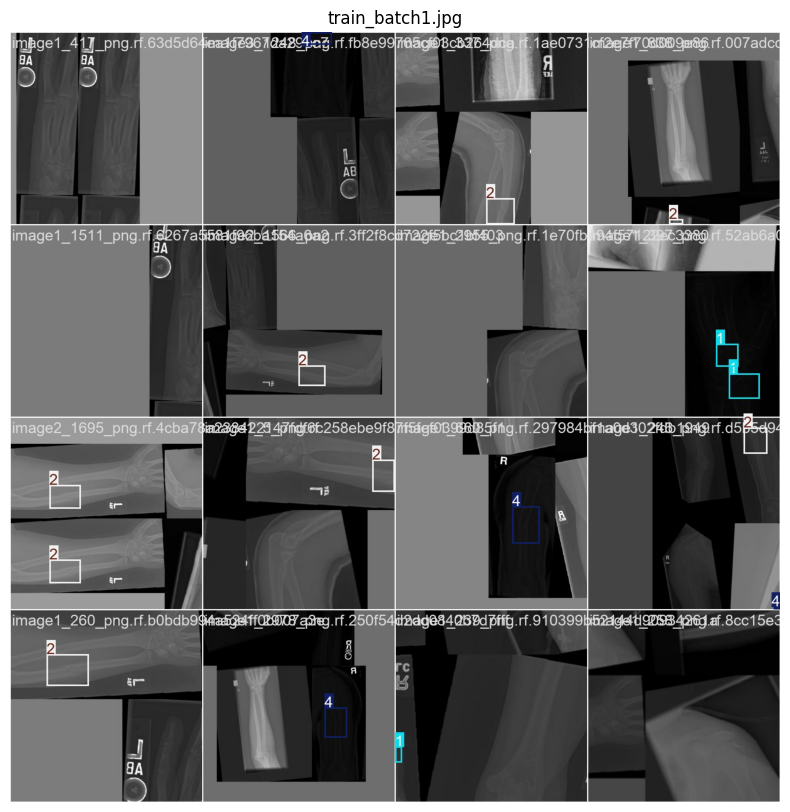

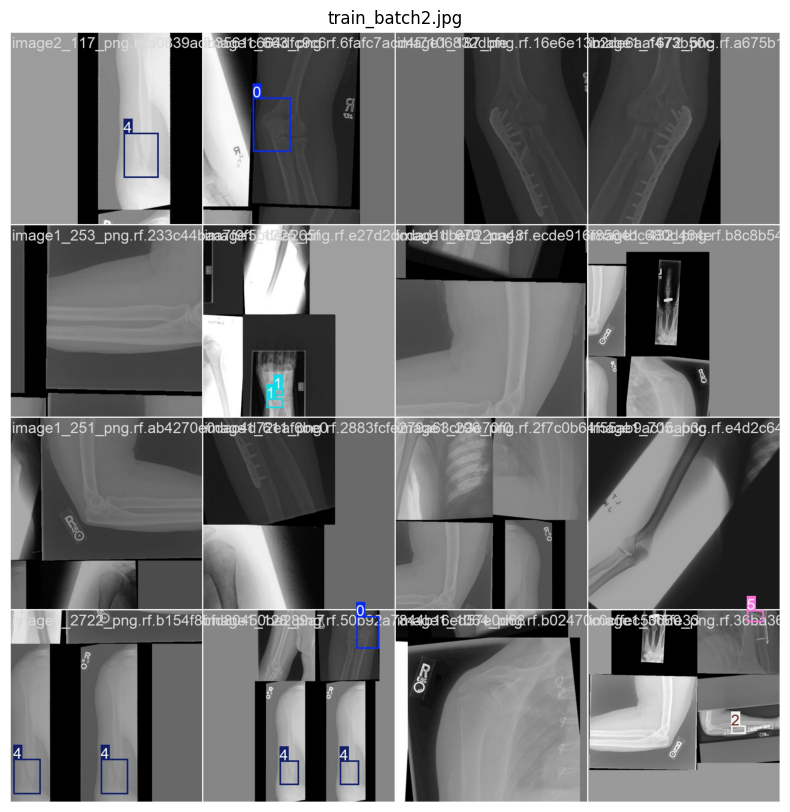

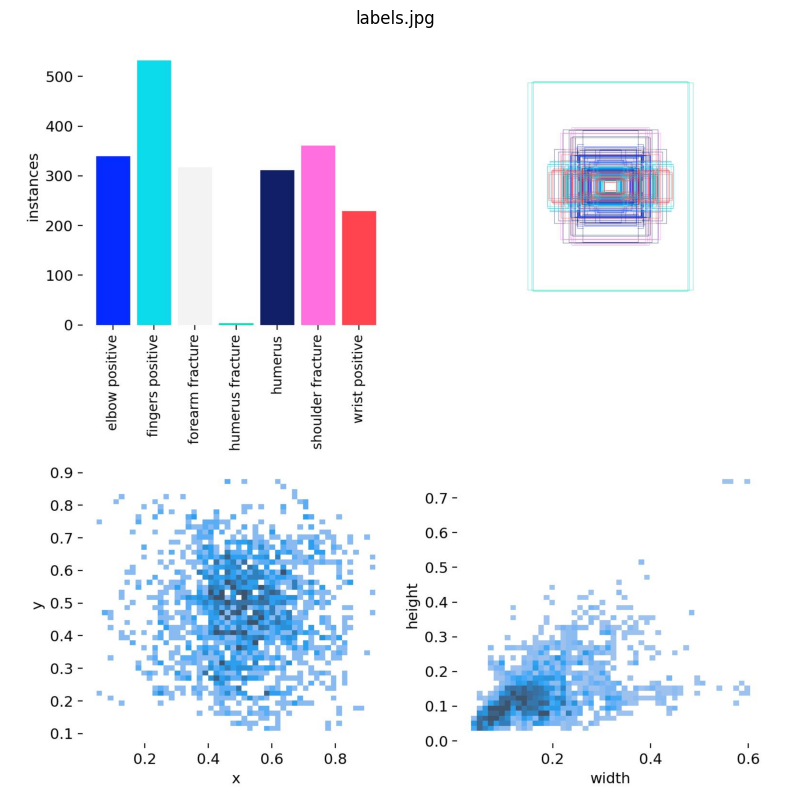

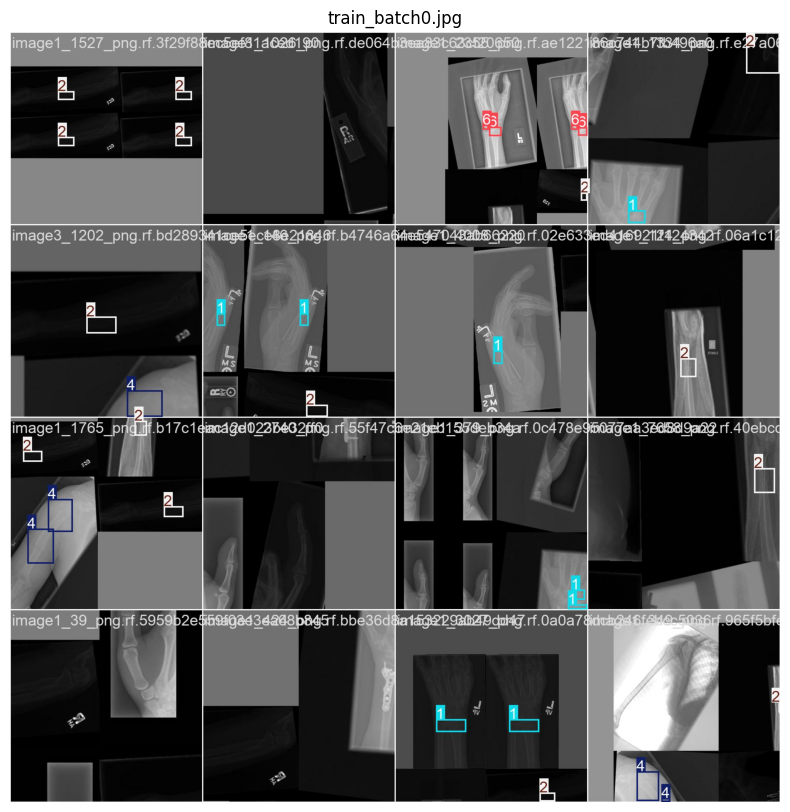

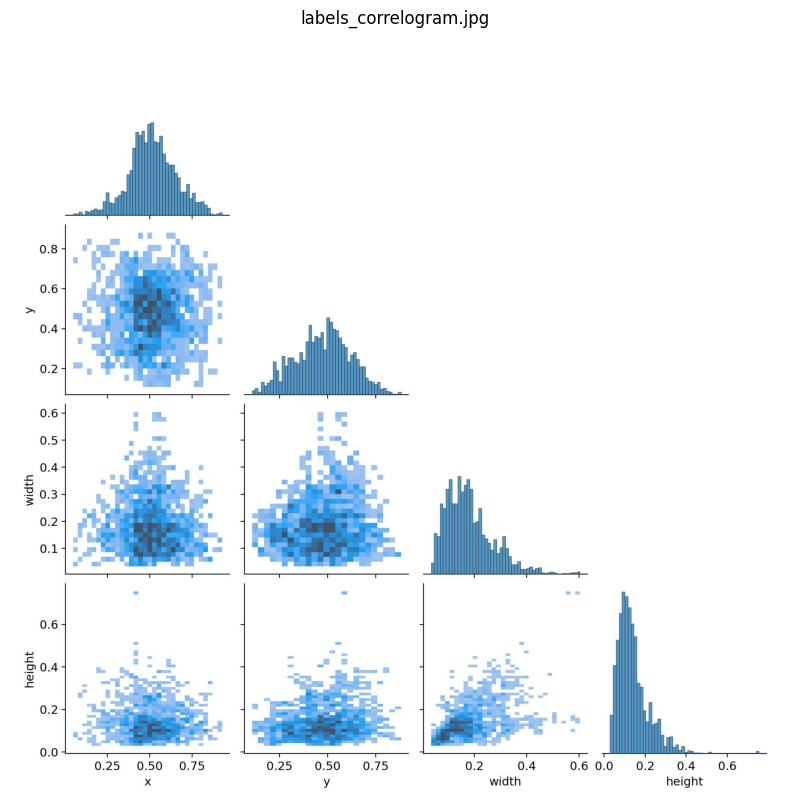

In [19]:
for img_name in result_images:
    img_path = os.path.join(results_dir, img_name)
    img = Image.open(img_path)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.title(img_name)
    plt.axis('off')
    plt.show()

In [25]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 kB 26.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


<font size="15">Validation</font>


In [49]:
import kagglehub
import cv2
import os
import random
import tkinter as tk
from tkinter import filedialog
#!pip install --upgrade --force-reinstall ultralytics
#!pip install ultralytics
import matplotlib.pyplot as plt
from ultralytics import YOLO
import cv2

In [43]:
metrics = model.val()

Ultralytics 8.3.35 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)


100%|██████████| 755k/755k [00:00<00:00, 69.2MB/s]
val: Scanning /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/valid/labels... 348 images, 175 backgrounds, 0 corrupt: 100%|██████████| 348/348 [00:01<00:00, 208.29it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/bone-fracture-detection-computer-vision-project/BoneFractureYolo8/valid is not writeable, cache not saved.


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 22/22 [00:07<00:00,  2.76it/s]


                   all        348        204      0.364      0.226      0.249     0.0838
        elbow positive         28         29      0.109     0.0345     0.0303    0.00853
      fingers positive         41         48      0.372      0.208      0.227     0.0568
      forearm fracture         37         43      0.617      0.419      0.427      0.169
               humerus         31         36      0.607      0.417      0.527      0.169
     shoulder fracture         19         20      0.204        0.1      0.133     0.0624
        wrist positive         17         28      0.277      0.179       0.15     0.0369
Speed: 0.8ms preprocess, 15.3ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val


In [55]:
val_directory = 'runs/detect/val'

In [57]:

result_images = [img for img in os.listdir(val_directory) if img.endswith('.jpg') or img.endswith('.png')]
result_images

['confusion_matrix_normalized.png',
 'F1_curve.png',
 'PR_curve.png',
 'val_batch2_pred.jpg',
 'R_curve.png',
 'val_batch0_pred.jpg',
 'val_batch2_labels.jpg',
 'val_batch1_pred.jpg',
 'P_curve.png',
 'val_batch1_labels.jpg',
 'confusion_matrix.png',
 'val_batch0_labels.jpg']

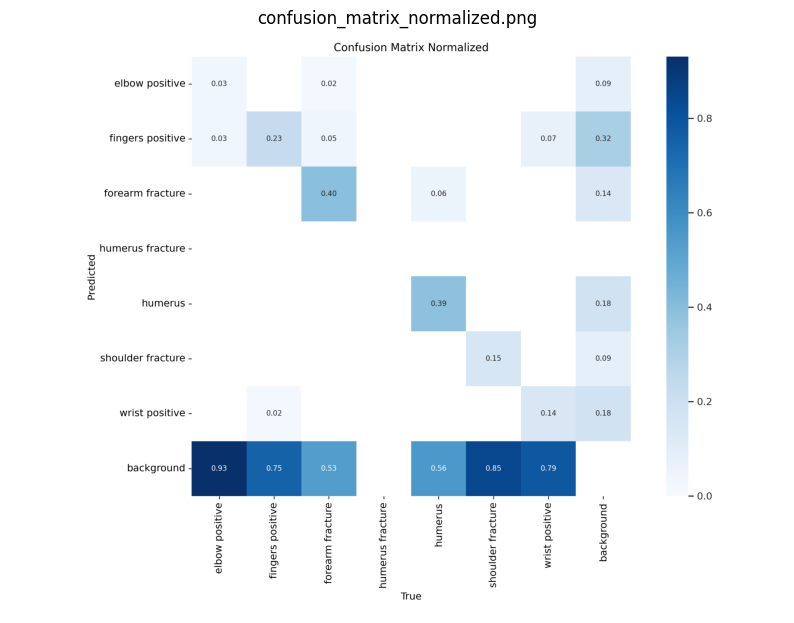

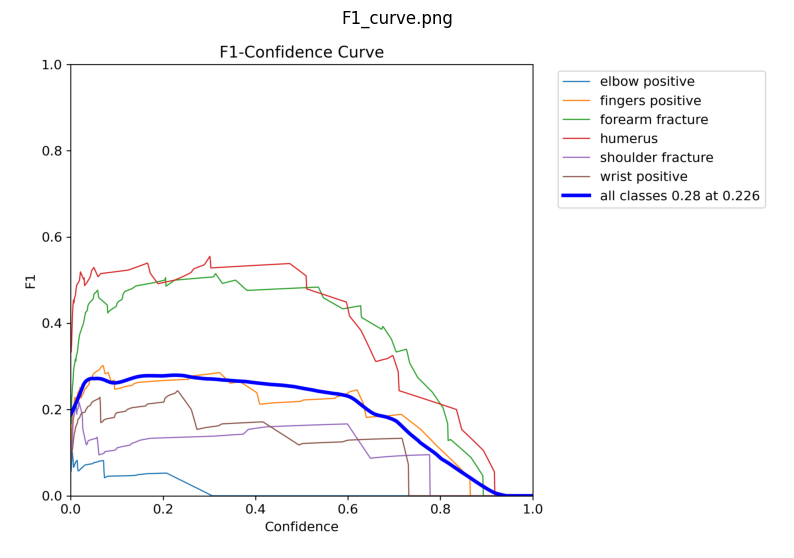

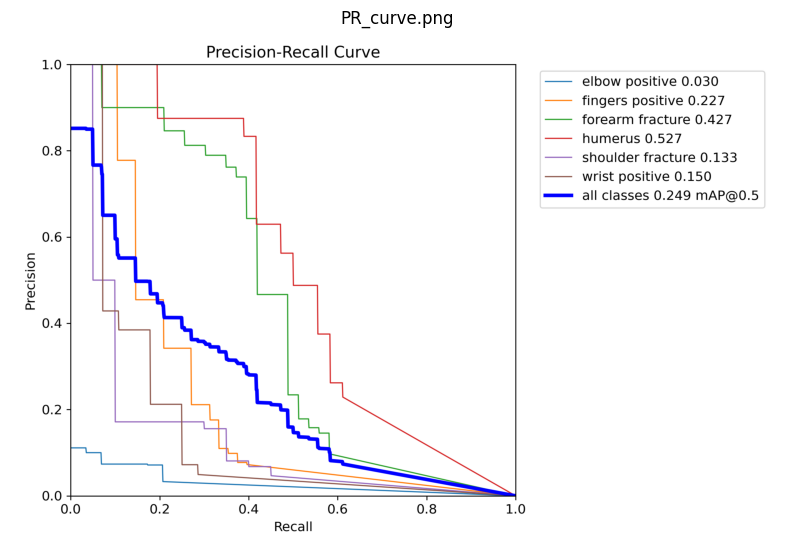

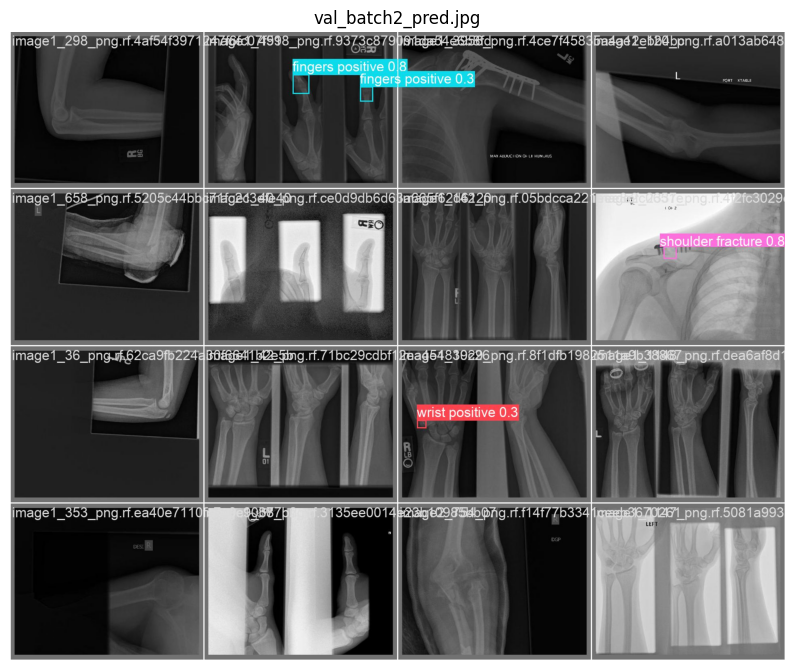

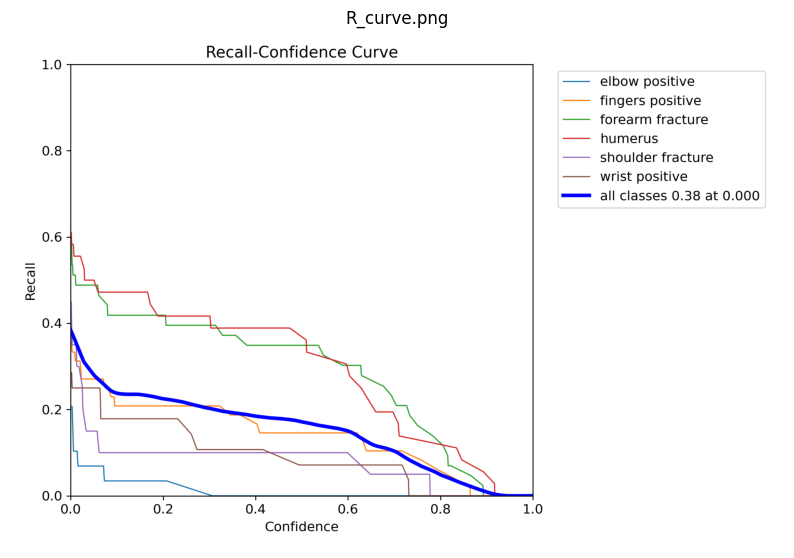

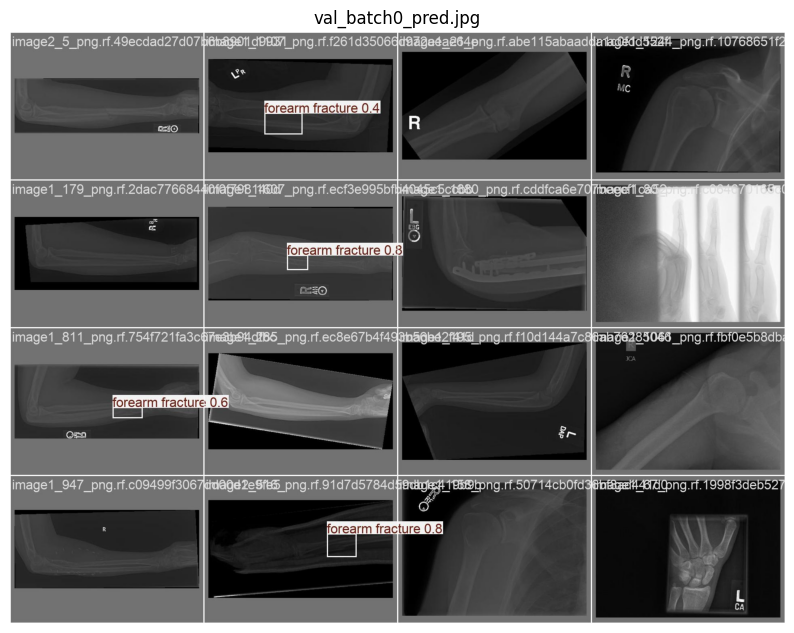

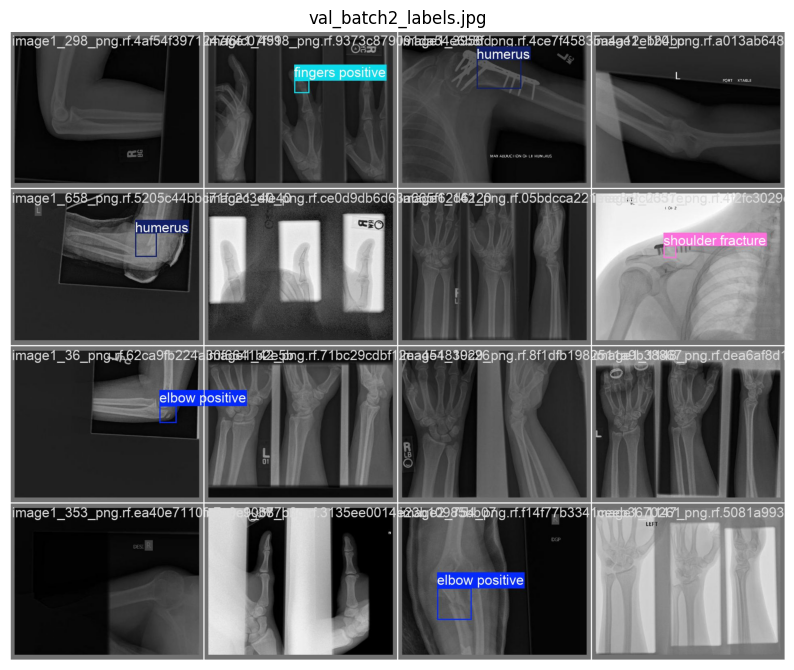

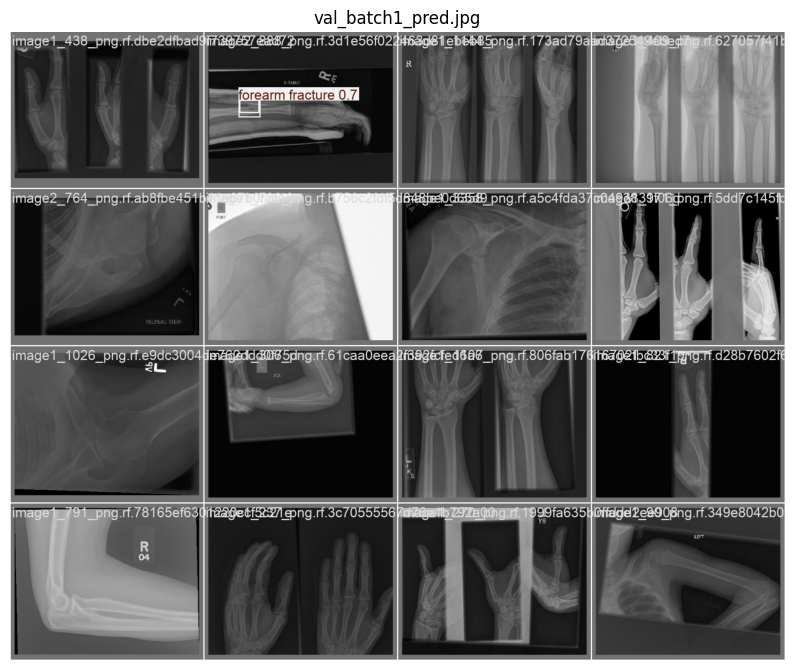

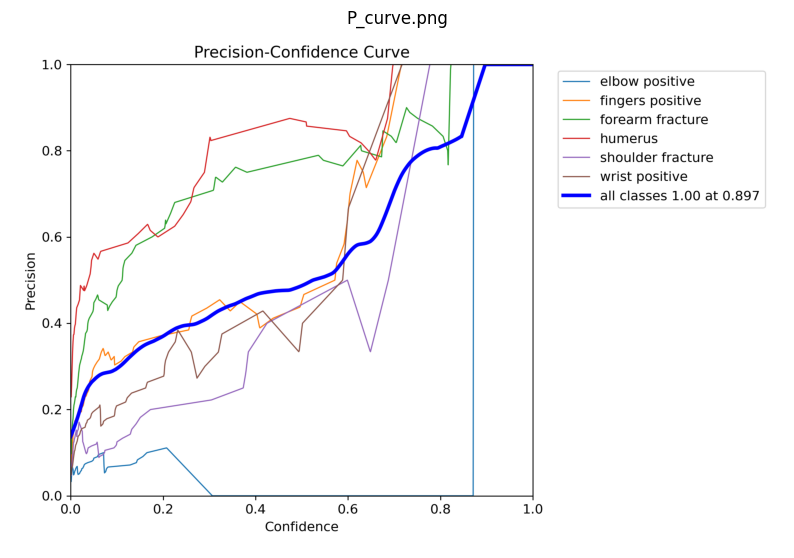

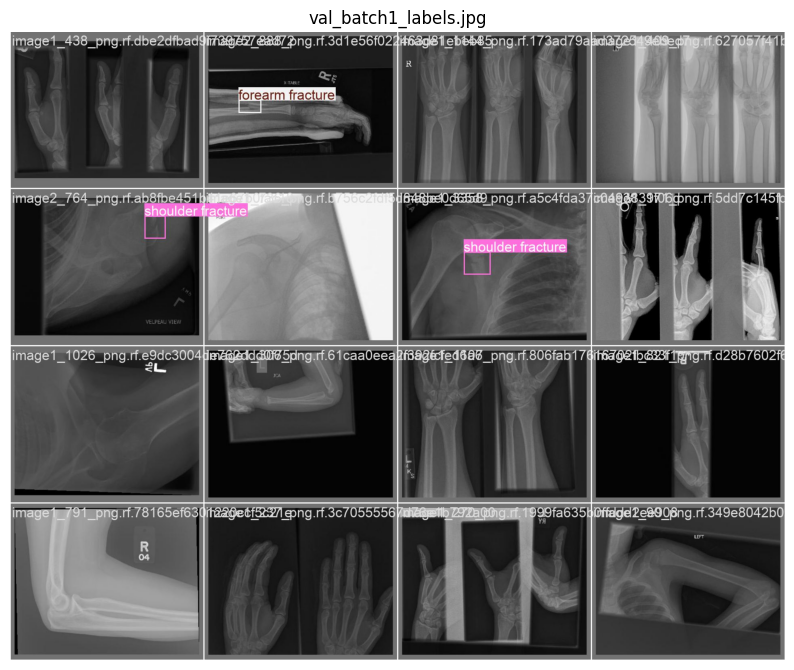

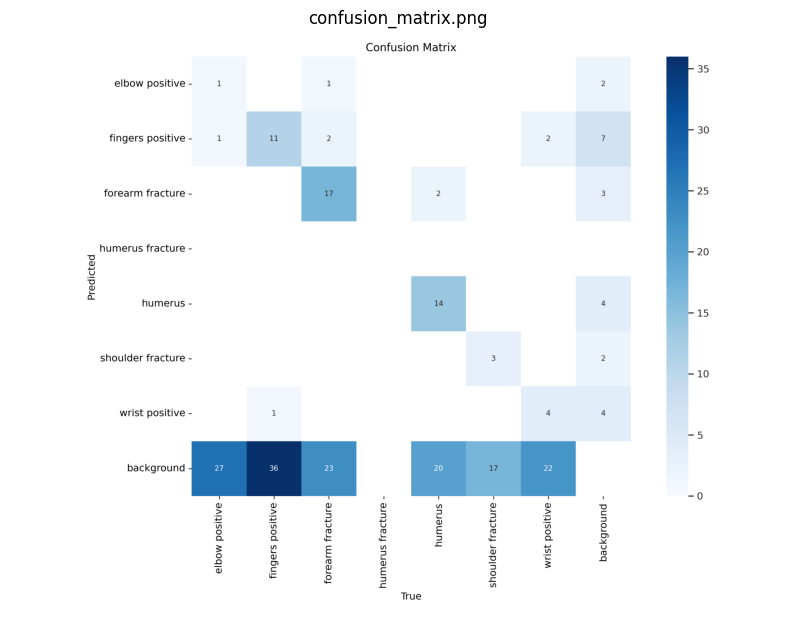

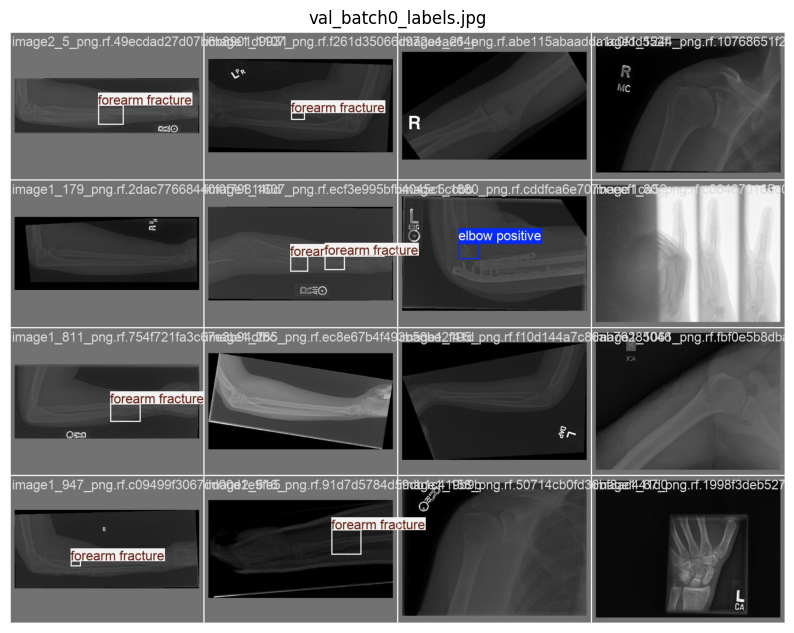

In [60]:
for img_name in result_images:
    img_path = os.path.join(val_directory, img_name)
    img = Image.open(img_path)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.title(img_name)
    plt.axis('off')
    plt.show()

<font size="15">Prediction</font>


In [92]:
model = YOLO('runs/detect/train4/weights/best.pt')

In [93]:

x = model.predict(source = 'https://www.ncbi.nlm.nih.gov/books/NBK574580/bin/ISOLATED__ULNA__.jpg', show_labels=True, show = True, show_boxes=True)
x

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


Found https://www.ncbi.nlm.nih.gov/books/NBK574580/bin/ISOLATED__ULNA__.jpg locally at ISOLATED__ULNA__.jpg
image 1/1 /kaggle/working/ISOLATED__ULNA__.jpg: 640x288 1 forearm fracture, 19.7ms
Speed: 1.7ms preprocess, 19.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 288)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'elbow positive', 1: 'fingers positive', 2: 'forearm fracture', 3: 'humerus fracture', 4: 'humerus', 5: 'shoulder fracture', 6: 'wrist positive'}
 obb: None
 orig_img: array([[[175, 175, 175],
         [170, 170, 170],
         [166, 166, 166],
         ...,
         [ 32,  32,  32],
         [ 33,  33,  33],
         [ 33,  33,  33]],
 
        [[176, 176, 176],
         [174, 174, 174],
         [173, 173, 173],
         ...,
         [ 33,  33,  33],
         [ 34,  34,  34],
         [ 34,  34,  34]],
 
        [[182, 182, 182],
         [182, 182, 182],
         [181, 181, 181],
         ...,
         [ 34,  34,  34],
         [ 34,  34,  34],
         [ 34,  34,  34]],
 
        ...,
 
        [[158, 158, 158],
         [161, 161, 161],
         [166, 166, 166],
         ...,
         [ 21,  21,  21],
         [ 21,  21,  21],
   

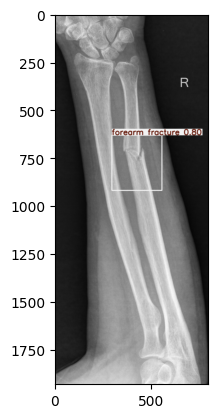

In [94]:
plt.imshow(x[0].plot())